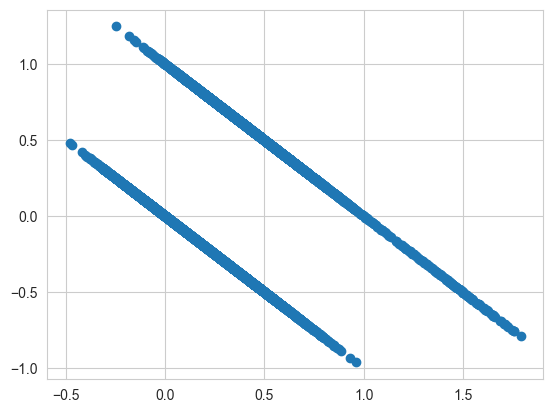

In [86]:
# 同方差 绘制残差图
# 一元回归： 横轴为自变量，纵轴为model_2.resid残差
# 多元回归： 横轴为拟合值，纵轴为残差 model_2.predict(data)   #拟合值
#残差图：如果为喇叭状就需要处理，对Y取对数，出现非正态也是对Y取对数
import matplotlib.pyplot as plt
plt.scatter(model.predict(df4), model.resid)

In [80]:
#计算每个变量的VIF值 1-3正常，3-10岭回归处理，>10建议删除
for i in range(0,df4_vif.shape[1]):
    print(df4_vif.columns[i], vif(df4_vif,i))

age 1.0330209278635276
type_employer 1.010181708975281
fnlwgt 1.0091388235441991
education_num 1.0458981599756112
race 1.0075784841151525
sex 1.0699403153050284
capital_gain 1.0290864663478567
capital_loss 1.0148143455759517
hr_per_week 1.0871570473814236
Inter 39.45534676118749


In [78]:
# vif时，需手动添加截距项
#手动去除因变量
#手动添加截距项
df4_vif = df4.drop(['income'], axis=1)
df4_vif['Inter'] = 1  #相当于添加了截距项
df4_vif.drop(['type_1','type_2','type_3','type_4','type_5','type_6','type_7','type_8','race_1','race_2','race_3','race_4'], axis=1, inplace=True)
df4_vif.head()

,age,type_employer,fnlwgt,education_num,race,sex,capital_gain,capital_loss,hr_per_week,Inter
0,39,0,77516,13,0,1,2174,0,40,1
1,50,1,83311,13,0,1,0,0,13,1
2,38,2,215646,9,0,1,0,0,40,1
3,53,2,234721,7,1,1,0,0,40,1
4,28,2,338409,13,1,0,0,0,40,1


In [74]:
formula2 = 'income~age+fnlwgt+education_num+sex+capital_gain+capital_loss+hr_per_week+type_1+type_2+type_3+type_4+type_5+type_6+type_7+type_8+race_1+race_2+race_3+race_4'
#实例化
model2 = osl(formula=formula2, data=df4)
#拟合模型
model2 = model2.fit()
#输出拟合结果
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     596.6
Date:                Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:00:23   Log-Likelihood:                -13671.
No. Observations:               32561   AIC:                         2.738e+04
Df Residuals:                   32541   BIC:                         2.755e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7296      0.017    -43.739      0.000      -0.762      -0.697
age               0.0058      0.000     37.251      0.000       0.005       0.006
fnlwgt         7.673e-08   1.96e-08      3.908      0.000    3.82e-08    1.15e-07
education_num     0.0453      0.001     54.606      0.000       0.044       0.047
sex               0.1359      0.005     30.002      0.000       0.127       0.145
capital_gain   9.144e-06   2.81e-07     32.520      0.000    8.59e-06    9.69e-06
capital_loss      0.0001    5.1e-06     22.351      0.000       0.000       0.000
hr_per_week       0.0039      0.000     22.366      0.000       0.004       0.004
type_1           -0.0373      0.013     -2.937      0.003      -0.062      -0.012
type_2            0.0164      0.011      1.542      0.123      -0.004       0.037
type_3            0.0980      0.016      6.239      0.000       0.067       0.129
type_4            0.0157      0.013      1.208      0.227      -0.010       0.041
type_5           -0.0389      0.014     -2.883      0.004      -0.065      -0.012
type_6            0.1328      0.015      8.718      0.000       0.103       0.163
type_7           -0.1847      0.099     -1.866      0.062      -0.379       0.009
type_8            0.0652      0.140      0.467      0.641      -0.209       0.339
race_1           -0.0582      0.007     -8.212      0.000      -0.072      -0.044
race_2           -0.0204      0.012     -1.746      0.081      -0.043       0.003
race_3           -0.0633      0.021     -3.004      0.003      -0.105      -0.022
race_4           -0.0521      0.023     -2.313      0.021      -0.096      -0.008
==============================================================================
Omnibus:                     3070.756   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3909.386
Skew:                           0.837   Prob(JB):                         0.00
Kurtosis:                       2.721   Cond. No.                     1.49e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
df4.head()

,age,type_employer,fnlwgt,education_num,race,sex,capital_gain,capital_loss,hr_per_week,income,...,type_3,type_4,type_5,type_6,type_7,type_8,race_1,race_2,race_3,race_4
0,39,0,77516,13,0,1,2174,0,40,0,...,0,0,0,0,0,0,0,0,0,0
1,50,1,83311,13,0,1,0,0,13,0,...,0,0,0,0,0,0,0,0,0,0
2,38,2,215646,9,0,1,0,0,40,0,...,0,0,0,0,0,0,0,0,0,0
3,53,2,234721,7,1,1,0,0,40,0,...,0,0,0,0,0,0,1,0,0,0
4,28,2,338409,13,1,0,0,0,40,0,...,0,0,0,0,0,0,1,0,0,0


In [100]:
#输出预测概率
temp = test.copy()
tem=temp.pop('income')
pre = model.predict(temp)
#预测标签（默认阈值0.5）
# 生成预测标签
pre_label = (pre>0.5).astype('int')
#输出分类报告，Y的真实值，Y的预测标签
# 模型评估（召回率），选择0.5为阈值
from sklearn.metrics import classification_report # 用于分类报告
print(classification_report(tem, pre_label))
# precision 精确率；recall 召回率 ；f1-score 相当于精确率与召回率的平均

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7379
           1       0.73      0.43      0.54      2390

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769



,age,type_employer,fnlwgt,education_num,race,sex,capital_gain,capital_loss,hr_per_week,type_1,...,type_3,type_4,type_5,type_6,type_7,type_8,race_1,race_2,race_3,race_4
21227,59,2,35411,9,0,0,0,0,40,0,...,0,0,0,0,0,0,0,0,0,0
11307,40,2,326310,10,0,1,0,0,44,0,...,0,0,0,0,0,0,0,0,0,0
22842,25,2,268222,9,1,0,0,0,40,0,...,0,0,0,0,0,0,1,0,0,0
1751,38,2,304651,9,0,1,0,0,60,0,...,0,0,0,0,0,0,0,0,0,0
17603,42,4,263871,9,0,1,0,0,8,0,...,0,1,0,0,0,0,0,0,0,0


In [94]:
formula = 'income~age+type_employer+fnlwgt+education_num+sex+capital_gain+capital_loss+hr_per_week+type_1+type_2+type_3+type_4+type_5+type_6+type_7+type_8+race_1+race_2+race_3+race_4'
#实例化
model = smf.logit(formula=formula, data=train)
#拟合模型
model = model.fit()
#输出拟合结果
model.summary()

         Current function value: 0.385329
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                22792
Model:                          Logit   Df Residuals:                    22772
Method:                           MLE   Df Model:                           19
Date:                Mon, 20 Mar 2023   Pseudo R-squ.:                  0.2995
Time:                        16:26:00   Log-Likelihood:                -8782.4
converged:                      False   LL-Null:                       -12538.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -8.8908      0.185    -48.143      0.000      -9.253      -8.529
age               0.0435      0.002     27.729      0.000       0.040       0.047
type_employer    -1.3220        nan        nan        nan         nan         nan
fnlwgt          5.74e-07   1.84e-07      3.128      0.002    2.14e-07    9.34e-07
education_num     0.3215      0.009     37.686      0.000       0.305       0.338
sex               1.1707      0.049     23.784      0.000       1.074       1.267
capital_gain      0.0003   1.18e-05     27.364      0.000       0.000       0.000
capital_loss      0.0006   3.95e-05     15.984      0.000       0.001       0.001
hr_per_week       0.0315      0.002     18.687      0.000       0.028       0.035
type_1            0.9119        nan        nan        nan         nan         nan
type_2            2.6871        nan        nan        nan         nan         nan
type_3            4.5945        nan        nan        nan         nan         nan
type_4            5.2763        nan        nan        nan         nan         nan
type_5            5.7229        nan        nan        nan         nan         nan
type_6            8.5103        nan        nan        nan         nan         nan
type_7          -12.0513        nan        nan        nan         nan         nan
type_8           -4.7267        nan        nan        nan         nan         nan
race_1           -0.4968      0.080     -6.207      0.000      -0.654      -0.340
race_2           -0.0975      0.105     -0.930      0.352      -0.303       0.108
race_3           -0.7718      0.254     -3.033      0.002      -1.270      -0.273
race_4           -0.6043      0.294     -2.056      0.040      -1.180      -0.028
=================================================================================
"""

In [93]:
#划分数据集
train, test= train_test_split(df4, test_size= 0.3,random_state= 6)

In [26]:
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [25]:
df4['income']=df4['income'].replace({'<=50K\n':0,'>50K\n':1})
df4.head(3)

,age,type_employer,fnlwgt,education_num,race,sex,capital_gain,capital_loss,hr_per_week,income,...,type_3,type_4,type_5,type_6,type_7,type_8,race_1,race_2,race_3,race_4
0,39,0,77516,13,0,1,2174,0,40,0,...,0,0,0,0,0,0,0,0,0,0
1,50,1,83311,13,0,1,0,0,13,0,...,0,0,0,0,0,0,0,0,0,0
2,38,2,215646,9,0,1,0,0,40,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df4=df2.copy()

In [19]:
#随机森林，特点1：二个随机，样本随机，特征随机，导致不同的采样集
#OOB,袋外样本，天然的测式集
#Bagging 随机森林
# 训练模型Baseline 基线模型，并在此基础上进行调参
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(bootstrap=True,oob_score=True) #袋外样本必需设置
RF.fit(Xtrain,Ytrain)
RF.score(Xtest,Ytest)

RandomForestClassifier(oob_score=True)

0.8304841846657796

In [18]:
# 基学习器用逻辑回归，集成50个基学习器
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
LR3 = LogisticRegression()
bag = BaggingClassifier(base_estimator=LR3,n_estimators=50)
bag.fit(Xtrain, Ytrain)   # 计算
bag.score(Xtest, Ytest)

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=50)

0.7961920360323472

In [17]:
#Boosting,Bagging
# 基学习器用逻辑回归，集成最多20个基学习器
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
#先实例一个机器学习器
LR2 = LogisticRegression()
ada= AdaBoostClassifier(base_estimator= LR2, n_estimators= 20)  # 实例化
ada.fit(Xtrain, Ytrain)   # 计算
ada.score(Xtest, Ytest)

AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=20)

0.7996724332070836

In [16]:
#单独逻辑回归
# 训练模型
from sklearn.linear_model import LogisticRegression
#实例化
LR = LogisticRegression()
LR.fit(Xtrain,Ytrain)
#逻辑回归的准确率，正常先看训练集，高参后再看测试集
LR.score(Xtrain,Ytrain)
LR.score(Xtest,Ytest)

LogisticRegression()

0.7973411723411723

0.7962944006551336

In [15]:
# 分割测试集
# 分层抽样 stratify=labels,按因变量y的比例
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest= train_test_split(df3, y,
                                               test_size= 0.3,
                                               random_state= 42,
                                               stratify= y)

In [14]:
y = df3.pop('income')
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [13]:
df3['income']=df3['income'].replace({'<=50K\n':0,'>50K\n':1})
df3.income.value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [12]:
df3.drop(['type_employer','race'],axis=1,inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            32561 non-null  int64 
 1   fnlwgt         32561 non-null  int64 
 2   education_num  32561 non-null  int64 
 3   sex            32561 non-null  int64 
 4   capital_gain   32561 non-null  int64 
 5   capital_loss   32561 non-null  int64 
 6   hr_per_week    32561 non-null  int64 
 7   income         32561 non-null  object
 8   type_1         32561 non-null  uint8 
 9   type_2         32561 non-null  uint8 
 10  type_3         32561 non-null  uint8 
 11  type_4         32561 non-null  uint8 
 12  type_5         32561 non-null  uint8 
 13  type_6         32561 non-null  uint8 
 14  type_7         32561 non-null  uint8 
 15  type_8         32561 non-null  uint8 
 16  race_1         32561 non-null  uint8 
 17  race_2         32561 non-null  uint8 
 18  race_3         32561 non-n

In [11]:
df2=df2.join(dummy_race)
df3=df2.copy()

In [10]:
dummy_race = pd.get_dummies(df2['race'], prefix='race', drop_first=True)
dummy_race.head()

,race_1,race_2,race_3,race_4
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,1,0,0,0
4,1,0,0,0


In [12]:
label_race = df2['race'].unique().tolist()
label_race
#对原数据进行编码
df2['race'] = df2['race'].apply(lambda x: label_race.index(x))
df2.head()

['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']

,age,type_employer,fnlwgt,education_num,race,sex,capital_gain,capital_loss,hr_per_week,income
0,39,0,77516,13,0,1,2174,0,40,0
1,50,1,83311,13,0,1,0,0,13,0
2,38,2,215646,9,0,1,0,0,40,0
3,53,2,234721,7,1,1,0,0,40,0
4,28,2,338409,13,1,0,0,0,40,0


In [24]:
df2.shape
len(df2)

(32561, 10)

32561

In [28]:
df2.head()

,age,type_employer,fnlwgt,education_num,race,sex,capital_gain,capital_loss,hr_per_week,income,type_1,type_2,type_3,type_4,type_5,type_6,type_7,type_8
32556,27,2,257302,12,0,0,0,0,38,<=50K\n,0,1,0,0,0,0,0,0
32557,40,2,154374,9,0,1,0,0,40,>50K\n,0,1,0,0,0,0,0,0
32558,58,2,151910,9,0,0,0,0,40,<=50K\n,0,1,0,0,0,0,0,0
32559,22,2,201490,9,0,1,0,0,20,<=50K\n,0,1,0,0,0,0,0,0
32560,52,6,287927,9,0,0,15024,0,40,>50K\n,0,0,0,0,0,1,0,0


In [8]:
df2=df2.join(dummy)
df2.head()

,age,type_employer,fnlwgt,education_num,race,sex,capital_gain,capital_loss,hr_per_week,income,type_1,type_2,type_3,type_4,type_5,type_6,type_7,type_8
0,39,0,77516,13,White,1,2174,0,40,<=50K\n,0,0,0,0,0,0,0,0
1,50,1,83311,13,White,1,0,0,13,<=50K\n,1,0,0,0,0,0,0,0
2,38,2,215646,9,White,1,0,0,40,<=50K\n,0,1,0,0,0,0,0,0
3,53,2,234721,7,Black,1,0,0,40,<=50K\n,0,1,0,0,0,0,0,0
4,28,2,338409,13,Black,0,0,0,40,<=50K\n,0,1,0,0,0,0,0,0


In [7]:
dummy = pd.get_dummies(df2['type_employer'], prefix='type', drop_first=True)
dummy.tail()

,type_1,type_2,type_3,type_4,type_5,type_6,type_7,type_8
32556,0,1,0,0,0,0,0,0
32557,0,1,0,0,0,0,0,0
32558,0,1,0,0,0,0,0,0
32559,0,1,0,0,0,0,0,0
32560,0,0,0,0,0,1,0,0


In [11]:
df2['income']=df2['income'].map({'<=50K\n':0,'>50K\n':1})
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            32561 non-null  int64 
 1   type_employer  32561 non-null  int64 
 2   fnlwgt         32561 non-null  int64 
 3   education_num  32561 non-null  int64 
 4   race           32561 non-null  object
 5   sex            32561 non-null  int64 
 6   capital_gain   32561 non-null  int64 
 7   capital_loss   32561 non-null  int64 
 8   hr_per_week    32561 non-null  int64 
 9   income         32561 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 2.5+ MB


In [10]:
df2['sex']=df2['sex'].replace({'Male':1,'Female':0})
df2.head()

,age,type_employer,fnlwgt,education_num,race,sex,capital_gain,capital_loss,hr_per_week,income
0,39,0,77516,13,White,1,2174,0,40,<=50K\n
1,50,1,83311,13,White,1,0,0,13,<=50K\n
2,38,2,215646,9,White,1,0,0,40,<=50K\n
3,53,2,234721,7,Black,1,0,0,40,<=50K\n
4,28,2,338409,13,Black,0,0,0,40,<=50K\n


In [9]:
df2.drop(['education','marital','occupation','relationship','country'],axis=1,inplace=True)

In [8]:
df2 = df.copy()
label = df2['type_employer'].unique().tolist()
label
#对原数据进行编码
df2['type_employer'] = df2['type_employer'].apply(lambda x: label.index(x))

['State-gov',
 'Self-emp-not-inc',
 'Private',
 'Federal-gov',
 'Local-gov',
 '?',
 'Self-emp-inc',
 'Without-pay',
 'Never-worked']

In [6]:
df11=df.copy()
df11['income']=df11['income'].map({'<=50K\n':0,'>50K\n':1})
df11.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [7]:
df11.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hr_per_week,income
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hr_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
income,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


In [3]:
df = pd.DataFrame(data) #  Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes

df.columns = ['age', 'type_employer', 'fnlwgt', 'education',
              "education_num","marital", "occupation", "relationship", "race","sex",
              "capital_gain", "capital_loss", "hr_per_week","country","income"]
df.head(3)

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n


In [2]:
import pandas as pd
import numpy as np
import os
os.__file__
os.chdir(r'C:\Data\Jupyter_file\DataScienceUB\introduction-datascience-python-book\files')
file = open('ch03/adult.data', 'r')
def chr_int(a):
    if a.isdigit():
        return int(a)
    else:
        return 0

data=[]
for line in file:
    data1=line.split(', ')
    if len(data1)==15:
        data.append([chr_int(data1[0]),data1[1],chr_int(data1[2]),data1[3],chr_int(data1[4]),data1[5],data1[6],\
            data1[7],data1[8],data1[9],chr_int(data1[10]),chr_int(data1[11]),chr_int(data1[12]),data1[13],\
            data1[14]])


'C:\\ProgramData\\Anaconda3\\envs\\cda_python\\lib\\os.py'

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")